In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

##Data Analysis

In [28]:
df = pd.read_excel('dataset.xlsx', sheet_name='Sheet1') 
data = df.iloc[:,:-1].values

In [45]:
#Split Dataset
X = df_scaled.drop(columns=['Class'])
y = df_scaled['Class']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

###Dimension Reduction

In [48]:
#Dimension Reduction PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

In [49]:
# Plot sebagai strip plot

def plot_dimension(data):
    plt.scatter(data[:, 0], y_train, c=y_train, cmap='tab10', alpha=0.7)
    plt.colorbar(ticks=range(len(y.unique())), label='Class')
    plt.title("t-SNE Dimensionality Reduction (1D)")
    plt.xlabel("t-SNE 1")
    plt.ylabel("Class")
    plt.show()

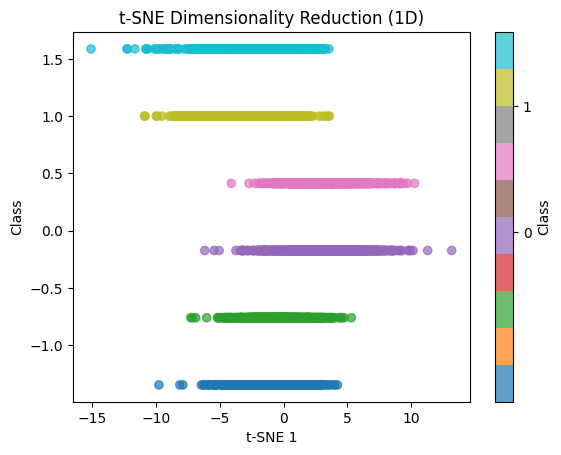

In [50]:
plot_dimension(X_pca)

In [51]:
# loading_df = pd.DataFrame(pca.components_, columns=X_train.columns, index=[f'PC{i+1}' for i in range(15)])

# print(loading_df)

In [52]:
#Dimension Reduction TSNE
tsne = TSNE(n_components=2, perplexity=21, n_iter=1269, random_state=42, learning_rate = 18.896459784706366)
X_tsne = tsne.fit_transform(X_train)

d:\Kuliah\JST\Neural-Network-Final-Project\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


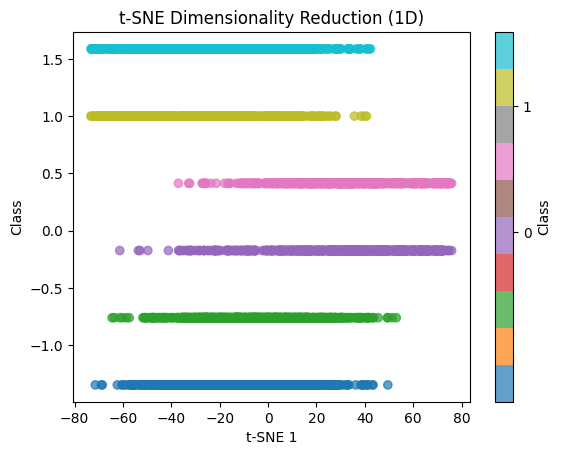

In [53]:
plot_dimension(X_tsne)

###Building Model

In [54]:
class SOMlinier:
    def __init__(self, m, fitur, R, alpha, tau):
        self.m = m 
        self.fitur = fitur 
        self.w = np.random.rand(m, fitur) 
        self.R0 = R 
        self.alpha0 = alpha
        self.tau = tau
    
    def hitung_bmu(self, x):
        # Menghitung jarak antara x dan setiap neuron
        D = np.linalg.norm(self.w - x, axis=1)
        # Kembalikan indeks dari BMU (neuron dengan jarak terdekat)
        return np.argmin(D)
    
    def hitung_second_bmu(self, x):
        # Menghitung jarak antara x dan setiap neuron
        D = np.linalg.norm(self.w - x, axis=1)
        # Urutkan indeks jarak, ambil indeks kedua terdekat
        return np.argsort(D)[1]
    
    def update_bobot(self, x, j, R, alpha):
        for i in range(self.m):
            jarak = abs(i - j)
            if jarak <= R:
                influence = np.exp(-jarak**2 / (2 * (R**2)))
                self.w[i] += alpha * influence * (x - self.w[i])
    
    def kurangi_radius(self, iterasi):
        return self.R0 * np.exp(-iterasi / self.tau)

    def kurangi_learning_rate(self, iterasi):
        return self.alpha0 * np.exp(-iterasi / self.tau)

    def train(self, data, n_iterasi):
        for t in range(n_iterasi):
            x = data[np.random.randint(0, len(data))]
            j = self.hitung_bmu(x)
            R = self.kurangi_radius(t)
            alpha = self.kurangi_learning_rate(t)
            self.update_bobot(x, j, R, alpha)

    def quantization_error(self, data):
        # Menghitung Quantization Error (QE) sebagai rata-rata jarak antara data dan BMU-nya
        total_error = np.mean([np.linalg.norm(x - self.w[self.hitung_bmu(x)]) for x in data])
        return total_error
    
    def topographic_error(self, data):
        # Menghitung Topographic Error (TE)
        errors = 0
        for x in data:
            bmu = self.hitung_bmu(x)
            second_bmu = self.hitung_second_bmu(x)
            # Cek jika BMU dan second BMU bertetangga (bedanya hanya 1 di grid linear)
            if abs(bmu - second_bmu) > 1:
                errors += 1
        te = errors / len(data)
        return te

In [55]:
X_train_np = X_train.values  # Ubah X_train dari DataFrame ke numpy array

# Inisialisasi SOM tanpa PCA dan t-SNE
m = 15
fitur = X_train_np.shape[1]  # Sesuaikan fitur berdasarkan dimensi X_train_np
R = 1
alpha0 = 0.11571090995138311
tau = 984

som_normal = SOMlinier(m=m, fitur=fitur, R=R, alpha=alpha0, tau=tau)

# Train SOM dengan data tanpa PCA dan t-SNE
n_iterations = 982
som_normal.train(X_train_np, n_iterations)

# Akses bobot SOM yang telah dilatih
weights_normal = som_normal.w
print("Trained SOM weights:", weights_normal)

Trained SOM weights: [[-0.54601831 -0.28605743 -0.97172232 -0.63011377 -0.32264019 -1.02190152
   0.16591146  0.02653121  1.26810409  0.14510307 -0.03105506  1.31405852
  -0.08706036 -0.05794695 -0.84280157]
 [ 0.89009734  0.15188553  0.86976397  0.64401184  0.74314155  0.77072701
   0.21613802  0.18669364  0.91529328  0.35960783  0.65951396  0.40814266
   0.65273763  0.6779189   0.78333764]
 [ 0.17380949  0.92582298  0.95540075  0.33929971  0.1005972   0.69750335
   0.99882861  0.08057628  0.83992172  0.69301248  0.36157471  0.56230868
   0.83975573  0.60162306  0.57302658]
 [ 0.44382421  0.57911962  0.64857352  0.15513474  0.50159415  0.73733993
   0.45273081  0.0978223   0.68582366  0.1618188   0.64454727  0.31846349
   0.29605382  0.58636397  0.43673721]
 [-1.22470202 -1.57260544 -0.84116447 -1.06493816 -1.63865616 -0.81887344
   1.72709635  1.84525498  0.81540718  1.81065897  1.93334201  0.82971501
  -1.53902485 -1.59492324 -1.09762163]
 [ 0.14712152  0.5258505   0.84767092  0.731

In [97]:
# Dengan PCA
m = 20      
fitur = 2
R = 4  
alpha0 = 0.11910072554906094          
tau = 584             


# Initialize the SOM
som_pca = SOMlinier(m=m, fitur=fitur, R=R, alpha=alpha0, tau=tau)

# Train the SOM with the PCA-reduced dataset
n_iterations = 1935  # Number of iterations
som_pca.train(X_pca, n_iterations)

# After training, you can access the SOM weights with:
weights_pca = som_pca.w
print("Trained SOM weights:", weights_pca)

Trained SOM weights: [[-6.56026676 -1.75787879]
 [-4.82073162 -1.08440955]
 [-3.44127362 -1.02434302]
 [-2.40677952 -0.97974462]
 [-2.18017603 -0.00739866]
 [-2.3180704   0.89576451]
 [-2.79188532  1.98869569]
 [-1.42528071  2.75600067]
 [ 0.27670352  2.55634074]
 [ 0.99178144  1.5027462 ]
 [ 0.11838744  0.83198081]
 [-0.49746956  0.1205651 ]
 [-0.66742686 -0.85341455]
 [ 0.17455233 -1.28684211]
 [ 1.23294225 -0.89822656]
 [ 1.84190433 -0.11021319]
 [ 2.79005482 -0.19353991]
 [ 3.74352322  0.49218521]
 [ 4.7068819  -0.85270692]
 [ 6.3371656  -1.13545667]]


C:\Users\lmaos\AppData\Local\Temp\ipykernel_9332\1682589008.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_bmu_indices_pca))  # Colormap 'tab10' untuk warna berbeda


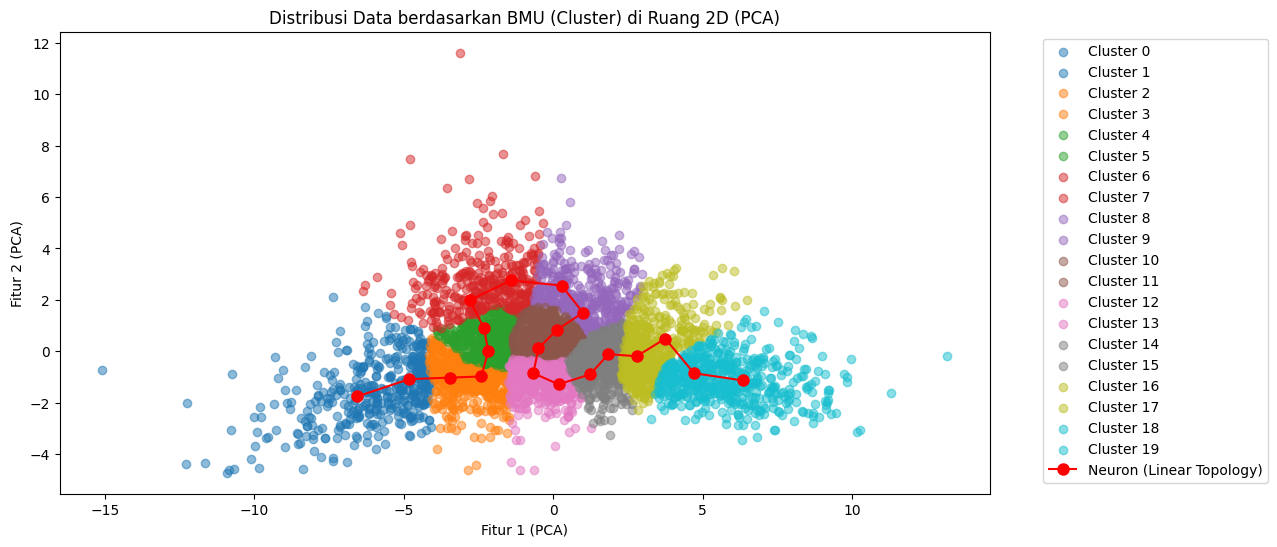

In [99]:
# Melakukan PCA ke 2D untuk visualisasi
from sklearn.decomposition import PCA

# Asumsi Anda sudah memiliki X_train sebagai data asli tanpa kelas (tanpa kolom 'Class')
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_train_np)

# Hitung BMU untuk setiap titik data dalam hasil PCA
bmu_indices_pca = np.array([som_pca.hitung_bmu(x) for x in X_pca_2d])

# Buat scatter plot dengan warna berbeda untuk setiap BMU berdasarkan hasil PCA
plt.figure(figsize=(12, 6))

# Loop untuk setiap BMU unik
unique_bmu_indices_pca = np.unique(bmu_indices_pca)
colors = plt.cm.get_cmap("tab10", len(unique_bmu_indices_pca))  # Colormap 'tab10' untuk warna berbeda

for i, bmu in enumerate(unique_bmu_indices_pca):
    # Filter data yang termasuk dalam BMU saat ini
    cluster_data_pca = X_pca_2d[bmu_indices_pca == bmu]
    plt.scatter(cluster_data_pca[:, 0], cluster_data_pca[:, 1], label=f'Cluster {bmu}', color=colors(i), alpha=0.5)

# Plot neuron dalam topologi linier untuk PCA sebagai titik merah
plt.plot(weights_pca[:, 0], weights_pca[:, 1], 'r-o', label="Neuron (Linear Topology)", markersize=8)

plt.title("Distribusi Data berdasarkan BMU (Cluster) di Ruang 2D (PCA)")
plt.xlabel("Fitur 1 (PCA)")
plt.ylabel("Fitur 2 (PCA)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [79]:
# Dengan t-SNE
m = 13
fitur = 2
R = 2                  
alpha0 = 0.10984552911262954              
tau = 698    
           

# Initialize the SOM
som_tsne = SOMlinier(m=m, fitur=fitur, R=R, alpha=alpha0, tau=tau)

# Train the SOM with the t-SNE-reduced dataset
som_tsne.train(X_tsne, n_iterations)

# After training, you can access the SOM weights with:
weights_tsne = som_tsne.w
print("Trained SOM weights:", weights_tsne)

Trained SOM weights: [[  5.77901178 -32.81478345]
 [ 31.32860779 -21.87747059]
 [ 20.4302658   -2.62936502]
 [ 23.13910131  24.83265198]
 [  4.63408008  30.61252413]
 [-15.84250995  35.29477353]
 [-34.34813813  14.88346008]
 [-57.70380872  -3.98324414]
 [-39.53967994 -16.4825848 ]
 [-19.08130292 -26.30206389]
 [ -4.95423418  -2.79928467]
 [ 38.48290069  10.0595191 ]
 [ 59.50844624  -2.9247239 ]]


C:\Users\lmaos\AppData\Local\Temp\ipykernel_9332\2329819418.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_bmu_indices))  # Menggunakan colormap 'tab10' untuk warna yang berbeda


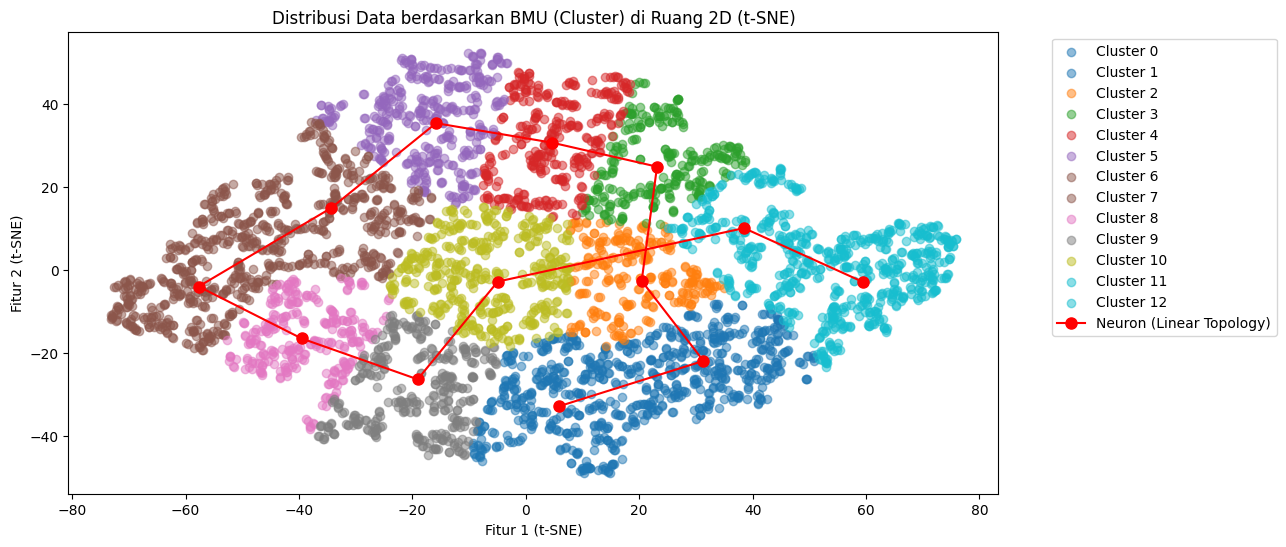

In [ ]:

# Hitung BMU untuk setiap titik data dalam X_tsne
bmu_indices = np.array([som_tsne.hitung_bmu(x) for x in X_tsne])

# Buat scatter plot dengan warna berbeda untuk setiap BMU
plt.figure(figsize=(12, 6))

# Loop untuk setiap BMU unik
unique_bmu_indices = np.unique(bmu_indices)
colors = plt.cm.get_cmap("tab10", len(unique_bmu_indices))  # Menggunakan colormap 'tab10' untuk warna yang berbeda

for i, bmu in enumerate(unique_bmu_indices):
    # Filter data yang termasuk dalam BMU saat ini
    cluster_data = X_tsne[bmu_indices == bmu]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {bmu}', color=colors(i), alpha=0.5)

# Plot neuron dalam topologi linier sebagai titik merah
plt.plot(weights_tsne[:, 0], weights_tsne[:, 1], 'r-o', label="Neuron (Linear Topology)", markersize=8)

plt.title("Distribusi Data berdasarkan BMU (Cluster) di Ruang 2D (t-SNE)")
plt.xlabel("Fitur 1 (t-SNE)")
plt.ylabel("Fitur 2 (t-SNE)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [60]:
import optuna
import numpy as np
from sklearn.metrics import silhouette_score

# Pastikan class SOMlinier sudah didefinisikan sebelumnya dengan metode quantization_error() dan topographic_error()

# Fungsi objektif untuk optimasi Optuna
def objective(trial):
    # Tuning parameter
    m = trial.suggest_int('m', 5, 20)           # Jumlah neuron
    R = trial.suggest_int('R', 1, 5)            # Radius
    alpha0 = trial.suggest_float('alpha0', 0.01, 0.5)  # Learning rate
    tau = trial.suggest_int('tau', 100, 1000)   # Konstanta peluruhan
    n_iterations = trial.suggest_int('n_iterations', 500, 2000)  # Iterasi pelatihan
    
    # Inisialisasi dan latih SOM dengan parameter yang dipilih
    som = SOMlinier(m=m, fitur=X_train_np.shape[1], R=R, alpha=alpha0, tau=tau)
    som.train(X_train_np, n_iterations)

    # Hitung QE, TE, dan Silhouette Score
    qe = som.quantization_error(X_train_np)
    te = som.topographic_error(X_train_np)

    # Hitung BMU untuk setiap data dan hitung Silhouette Score
    bmu_indices = np.array([som.hitung_bmu(x) for x in X_train_np])
    silhouette = silhouette_score(X_train_np, bmu_indices)
    
    # Kombinasikan ketiga metrik dengan bobot tertentu
    # Di sini, kita meminimalkan QE dan TE, tetapi memaksimalkan Silhouette Score
    # Jadi kita gunakan negatif Silhouette Score (karena Optuna meminimalkan nilai)
    combined_score = (0.4 * qe) + (0.4 * te) - (0.2 * silhouette)

    return combined_score

# Buat study untuk optimasi
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

# Cetak hasil terbaik
print("Best parameters for SOM:", study.best_params)
print("Best combined score:", study.best_value)


d:\Kuliah\JST\Neural-Network-Final-Project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-11-13 20:08:49,630] A new study created in memory with name: no-name-f8d5fc54-17e8-4576-af22-cd37f304722f
[I 2024-11-13 20:08:49,973] Trial 0 finished with value: 0.7169951106125313 and parameters: {'m': 8, 'R': 5, 'alpha0': 0.4879162741123224, 'tau': 969, 'n_iterations': 1875}. Best is trial 0 with value: 0.7169951106125313.
[I 2024-11-13 20:08:50,295] Trial 1 finished with value: 0.7311732163532046 and parameters: {'m': 7, 'R': 5, 'alpha0': 0.3640371529316453, 'tau': 302, 'n_iterations': 830}. Best is trial 0 with value: 0.7169951106125313.
[I 2024-11-13 20:08:50,622] Trial 2 finished with value: 0.7475070907288408 and parameters: {'m': 5, 'R': 4, 'alpha0': 0.07156655473027296, 'tau': 169, 'n_iterations': 102

Best parameters for SOM: {'m': 20, 'R': 5, 'alpha0': 0.45883975580301, 'tau': 886, 'n_iterations': 1151}
Best combined score: 0.592715249926192


In [61]:
import matplotlib.pyplot as plt

def visualize_all_features_full(data, labels, som):
    # Daftar nama fitur berdasarkan dataset
    features = ['Mean R', 'Mean G', 'Mean B', 
                'Std R', 'Std G', 'Std B', 
                'Skew R', 'Skew G', 'Skew B', 
                'Kurtosis R', 'Kurtosis G', 'Kurtosis B', 
                'Entropy R', 'Entropy G', 'Entropy B']
    
    # Tentukan warna untuk setiap kelas
    colors = ['r', 'g', 'b', 'c', 'm', 'y']  # Sesuaikan warna untuk kelas 1-6

    # Membuat subplot dengan jumlah sesuai dengan jumlah fitur (15)
    fig, axes = plt.subplots(len(features), 1, figsize=(12, 3 * len(features)), sharex=True)
    
    for idx, feature in enumerate(features):
        ax = axes[idx]
        
        # Plot neuron pada fitur yang sedang ditampilkan
        ax.plot(range(som.m), som.w[:, idx], 'bo-', markersize=10, label="Neurons")  # Neuron di sumbu horizontal
        
        # Plot setiap data point berdasarkan Best Matching Unit (BMU) dan fitur saat ini
        for i, x in enumerate(data):
            # Cari BMU untuk setiap data point
            bmu_index = som.hitung_bmu(x)
            # Plot data point dengan warna sesuai kategori
            ax.plot(bmu_index, x[idx], marker='o', color=colors[labels[i] - 1], alpha=0.6, label=f"Class {labels[i]}" if i == 0 else "")
        
        # Atur judul, label sumbu, dan grid untuk subplot
        ax.set_title(f"Linear SOM Clustering, without dimension reduction - {feature}")
        ax.set_ylabel(feature)
        ax.legend(["Neurons"] + [f"Class {i}" for i in range(1, 7)], loc="upper right")
        ax.grid(True)

    plt.xlabel("Neuron Index")
    plt.tight_layout()
    plt.show()

In [62]:
def visualize_reduced_features(data, labels, som):
    # Plot neuron pada satu komponen hasil reduksi dimensi
    plt.figure(figsize=(10, 6))
    
    # Plot posisi neuron di peta SOM untuk satu komponen
    plt.plot(range(som.m), som.w[:, 0], 'bo-', markersize=10, label="Neuron (Component 1)")

    # Warna untuk setiap kelas
    colors = ['r', 'g', 'b', 'c', 'm', 'y']

    # Plot setiap data point dengan satu komponen hasil reduksi
    for i, x in enumerate(data):
        bmu_index = som.hitung_bmu(x)
        # Hanya gunakan x[0] karena data hanya memiliki satu dimensi
        plt.plot(bmu_index, x[0], marker='o', color=colors[labels[i] - 1], alpha=0.6, label=f"Class {labels[i]}" if i == 0 else "")
    
    # Atur detail plot
    plt.title("t-SNE or PCA Clustering Visualization (1D)")
    plt.xlabel("Neuron Index")
    plt.ylabel("Reduced Dimension Component")
    plt.legend(["Neuron (Component 1)"] + [f"Class {i}" for i in range(1, 7)], loc="upper right")
    plt.grid(True)
    plt.show()

In [63]:
# visualize_all_features_full(X_train_np, y_train_np, som_normal) 

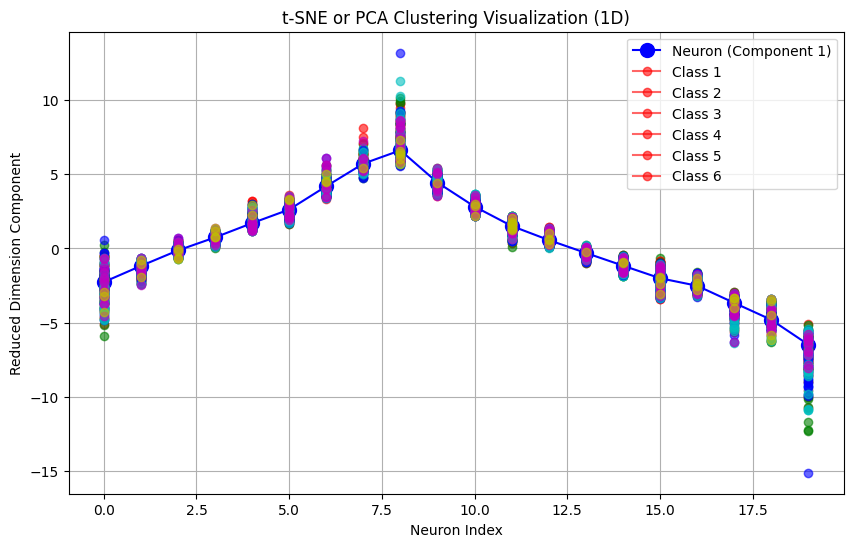

In [64]:
# Memanggil fungsi visualisasi dengan dataset PCA
visualize_reduced_features(X_pca, df["Class"].values, som_pca)

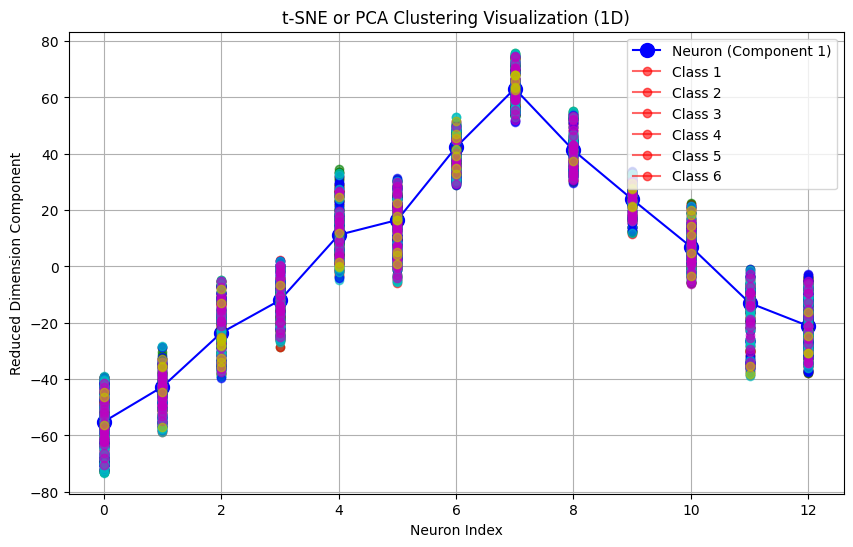

In [65]:
# Memanggil fungsi visualisasi dengan dataset t-sne
visualize_reduced_features(X_tsne, df["Class"].values, som_tsne)

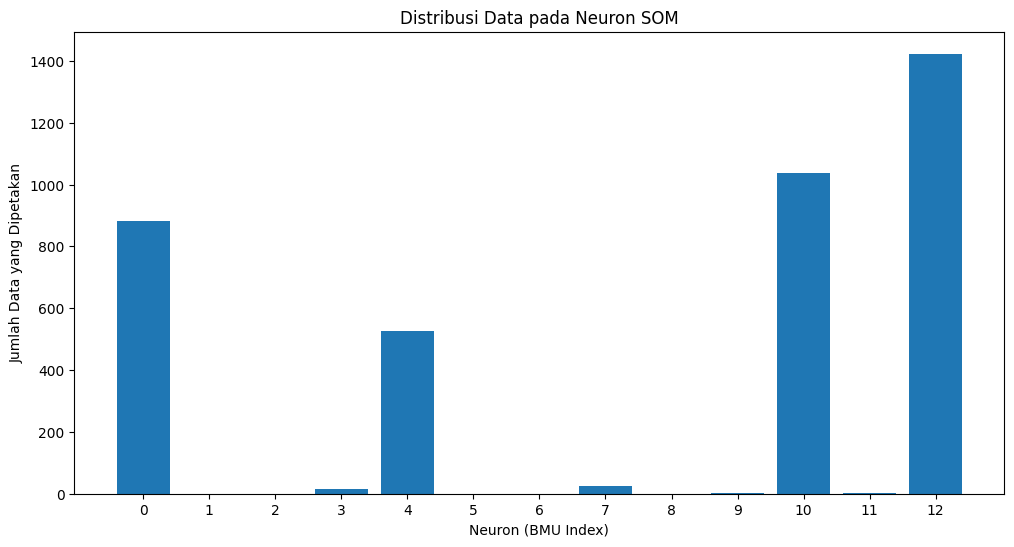

In [66]:
import matplotlib.pyplot as plt

# Menentukan BMU untuk setiap titik data
bmu_indices = [som_normal.hitung_bmu(x) for x in X_train_np]

# Membuat histogram untuk distribusi data pada setiap neuron
plt.figure(figsize=(12, 6))
plt.hist(bmu_indices, bins=range(m+1), align='left', rwidth=0.8)
plt.xlabel("Neuron (BMU Index)")
plt.ylabel("Jumlah Data yang Dipetakan")
plt.title("Distribusi Data pada Neuron SOM")
plt.xticks(range(m))
plt.show()


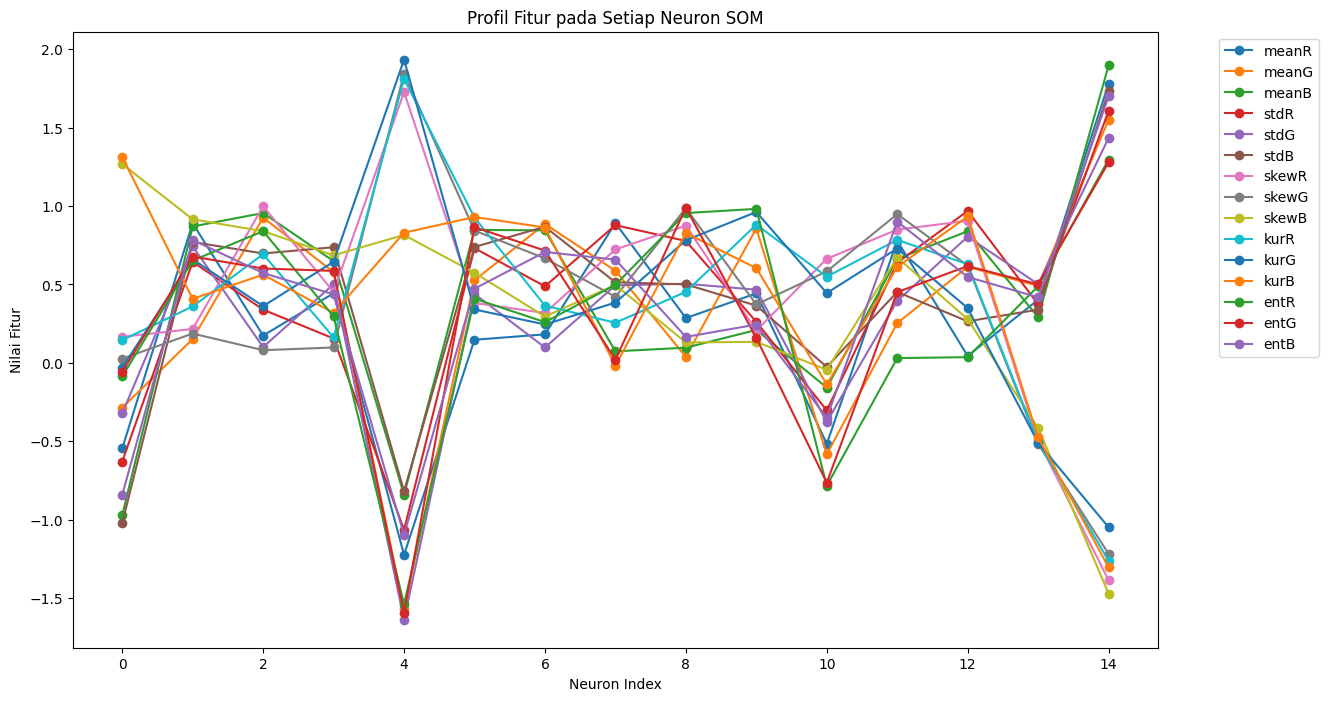

In [67]:
import pandas as pd

# Membuat DataFrame untuk profil neuron
weights_df = pd.DataFrame(weights_normal, columns=X_train.columns)

# Membuat plot untuk setiap fitur pada neuron
weights_df.plot(kind='line', figsize=(14, 8), marker='o')
plt.title("Profil Fitur pada Setiap Neuron SOM")
plt.xlabel("Neuron Index")
plt.ylabel("Nilai Fitur")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


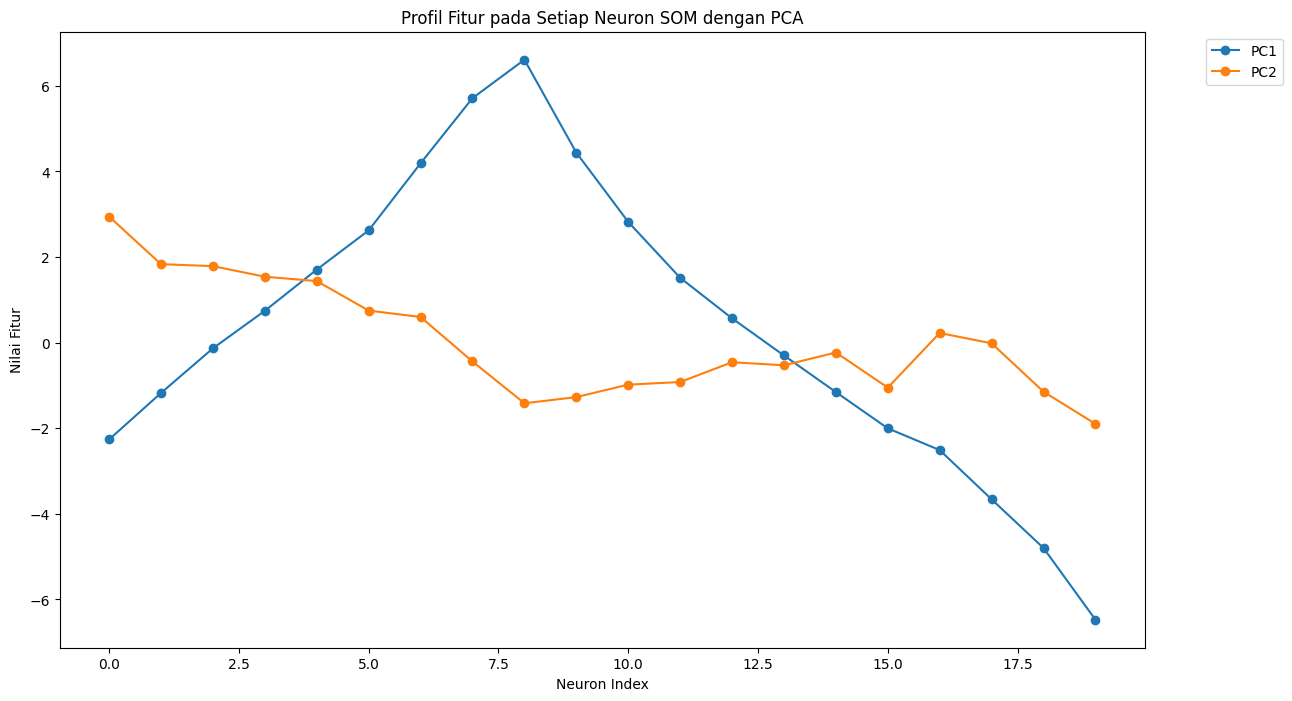

In [68]:
# Buat nama kolom untuk komponen utama hasil PCA
pca_columns = [f'PC{i+1}' for i in range(weights_pca.shape[1])]

# Membuat DataFrame untuk profil neuron
weights_df = pd.DataFrame(weights_pca, columns=pca_columns)

# Membuat plot untuk setiap fitur pada neuron
weights_df.plot(kind='line', figsize=(14, 8), marker='o')
plt.title("Profil Fitur pada Setiap Neuron SOM dengan PCA")
plt.xlabel("Neuron Index")
plt.ylabel("Nilai Fitur")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


C:\Users\lmaos\AppData\Local\Temp\ipykernel_13184\2329819418.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_bmu_indices))  # Menggunakan colormap 'tab10' untuk warna yang berbeda


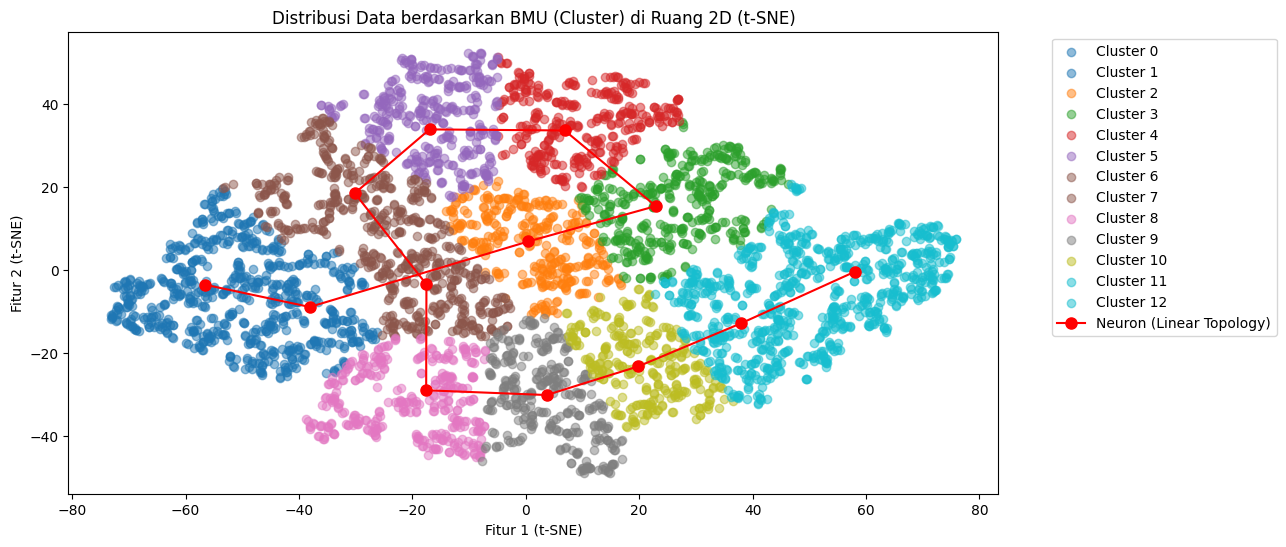

In [44]:

# Hitung BMU untuk setiap titik data dalam X_tsne
bmu_indices = np.array([som_tsne.hitung_bmu(x) for x in X_tsne])

# Buat scatter plot dengan warna berbeda untuk setiap BMU
plt.figure(figsize=(12, 6))

# Loop untuk setiap BMU unik
unique_bmu_indices = np.unique(bmu_indices)
colors = plt.cm.get_cmap("tab10", len(unique_bmu_indices))  # Menggunakan colormap 'tab10' untuk warna yang berbeda

for i, bmu in enumerate(unique_bmu_indices):
    # Filter data yang termasuk dalam BMU saat ini
    cluster_data = X_tsne[bmu_indices == bmu]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {bmu}', color=colors(i), alpha=0.5)

# Plot neuron dalam topologi linier sebagai titik merah
plt.plot(weights_tsne[:, 0], weights_tsne[:, 1], 'r-o', label="Neuron (Linear Topology)", markersize=8)

plt.title("Distribusi Data berdasarkan BMU (Cluster) di Ruang 2D (t-SNE)")
plt.xlabel("Fitur 1 (t-SNE)")
plt.ylabel("Fitur 2 (t-SNE)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


###Evaluasi 1

In [58]:
# Menghitung QE dan TE menggunakan numpy array (X_train_np)
qe = som_normal.quantization_error(X_train_np)
te = som_normal.topographic_error(X_train_np)

print("Quantization Error (QE):", qe)
print("Topographic Error (TE):", te)

Quantization Error (QE): 1.766319355461711
Topographic Error (TE): 0.9484969053934571


In [55]:
qe = som_pca.quantization_error(X_pca)
te = som_pca.topographic_error(X_pca)

print("Quantization Error (QE):", qe)
print("Topographic Error (TE):", te)

Quantization Error (QE): 1.4713804749691854
Topographic Error (TE): 0.3649425287356322


In [56]:
qe = som_tsne.quantization_error(X_tsne)
te = som_tsne.topographic_error(X_tsne)

print("Quantization Error (QE):", qe)
print("Topographic Error (TE):", te)

Quantization Error (QE): 11.060156206690465
Topographic Error (TE): 0.1240053050397878


In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:

silhouette_avg = silhouette_score(X_train, y_train.values)  # Gunakan y_train untuk mencocokkan data pada X_pca
print("Silhouette Score:", silhouette_avg)

Silhouette Score: -0.06274745154438173


In [ ]:
# Hitung Silhouette Score dengan label yang sesuai
silhouette_avg = silhouette_score(X_pca, y_train.values)  # Gunakan y_train untuk mencocokkan data pada X_pca
print("Silhouette Score:", silhouette_avg)

Silhouette Score: -0.06274745154438607


In [ ]:
silhouette_avg = silhouette_score(X_tsne, y_train.values)  # Gunakan y_train untuk mencocokkan data pada X_pca
print("Silhouette Score:", silhouette_avg)

Silhouette Score: -0.06814402


In [ ]:
from sklearn.metrics import davies_bouldin_score

In [ ]:
db_index = davies_bouldin_score(X_train, y_train.values)
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 12.058537056774233


In [ ]:
db_index = davies_bouldin_score(X_pca, y_train.values)
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 12.058537056774696


In [ ]:
db_index = davies_bouldin_score(X_tsne, y_train.values)
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 18.487113981691717


In [ ]:
from somperf.metrics import *
from somperf.utils.topology import rectangular_topology_dist

In [ ]:
map_size = (6, 1)  # 6 neurons in 1 row (linear SOM)

# Ambil bobot dari SOM hasil PCA yang sudah dilatih
weights_normal = som_normal.w  # weights_normal seharusnya berbentuk (6, 1)

# Hitung beberapa metrik menggunakan somperf
print('Topographic Product =', topographic_product(rectangular_topology_dist(map_size), weights_normal))
print('Neighborhood Preservation =', neighborhood_preservation(1, weights_normal, X_train))
print('Trustworthiness =', trustworthiness(1, weights_normal, X_train))

Topographic Product = -0.03841065105903301
Neighborhood Preservation = -7.894317192184706
Trustworthiness = 0.894162591318731


In [ ]:
map_size = (6, 1)  # 6 neurons in 1 row (linear SOM)

# Ambil bobot dari SOM hasil PCA yang sudah dilatih
weights_pca = som_pca.w  # weights_pca seharusnya berbentuk (6, 1)

# Hitung beberapa metrik menggunakan somperf
print('Topographic Product =', topographic_product(rectangular_topology_dist(map_size), weights_pca))
print('Neighborhood Preservation =', neighborhood_preservation(1, weights_pca, X_pca))
print('Trustworthiness =', trustworthiness(1, weights_pca, X_pca))

Topographic Product = -0.043877150356329796
Neighborhood Preservation = -7.850278146998015
Trustworthiness = 0.8942105569765528


In [ ]:
map_size = (6, 1)  # 6 neurons in 1 row (linear SOM)

# Ambil bobot dari SOM hasil PCA yang sudah dilatih
weights_tsne = som_tsne.w  # weights_tsne seharusnya berbentuk (6, 1)

# Hitung beberapa metrik menggunakan somperf
print('Topographic Product ==', topographic_product(rectangular_topology_dist(map_size), weights_tsne))
print('Neighborhood Preservation =', neighborhood_preservation(1, weights_tsne, X_tsne))
print('Trustworthiness =', trustworthiness(1, weights_tsne, X_tsne))

Topographic Product = -0.03893244276043883
Neighborhood Preservation = 0.03446227716271488
Trustworthiness = 0.9312427236759588


###Tuning